<a href="https://colab.research.google.com/github/renatsperanca/renatsperanca/blob/main/projeto_vendas-dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>O que é o Colaboratory?</h1>

O Colaboratory ou "Colab" permite escrever código Python no seu navegador, com: 
- Nenhuma configuração necessária
- Acesso gratuito a GPUs
- Compartilhamento fácil

Você pode ser um <strong>estudante</strong>, um <strong>cientista de dados</strong> ou um <strong>pesquisador de IA</strong>, o Colab pode facilitar seu trabalho. Assista ao vídeo <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a usá-lo abaixo!

In [114]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [115]:
df = pd.read_excel("AdventureWorks.xlsx")

In [116]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [117]:
df.shape

(904, 16)

In [118]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

## <strong>Primeiros passos</strong>

O documento que você está lendo não é uma página da Web estática, mas sim um ambiente interativo chamado <strong>notebook Colab</strong> que permite escrever e executar código.

Por exemplo, aqui está uma <strong>célula de código</strong> com um breve script Python que calcula um valor, armazena-o em uma variável e imprime o resultado:

In [120]:
df['Valor Venda'].sum()

5984606.1426

In [125]:
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48


In [127]:
round(df["Custo"].sum(),2) #soma de todos os custos

2486783.05

In [128]:
df["Lucro"] = df["Valor Venda"] - df["Custo"]
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48,2456.52


In [129]:
round(df["Lucro"].sum(),2)

3497823.09

In [144]:
#df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"] #retorna com a palavra "days" tranformando em string, para tirar media precisa retirar a palavra
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [145]:
df["Tempo Envio"].dtypes

dtype('int64')

In [146]:
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [147]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [153]:
pd.options.display.float_format ='{:20,.2f}'.format
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [155]:
df.groupby(df["Marca"])["Lucro"].sum().reset_index()

,Marca,Lucro
0,Adventure Works,"712,036.24"
1,Contoso,"194,674.95"
2,Fabrikam,"2,591,111.90"


In [154]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index() #armazena a query na variavel
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [156]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

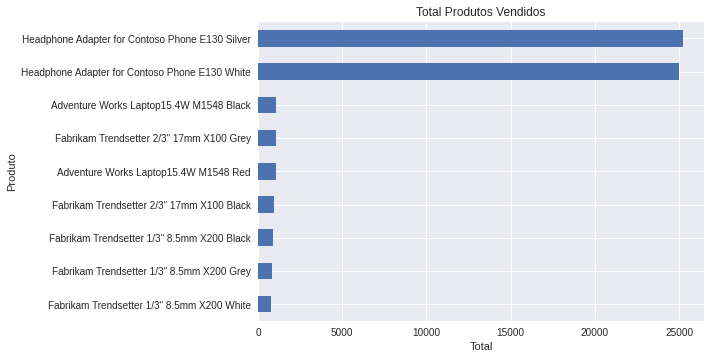

In [157]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

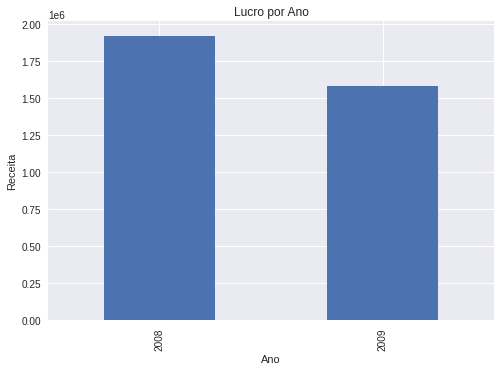

In [158]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro por Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [159]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [160]:
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


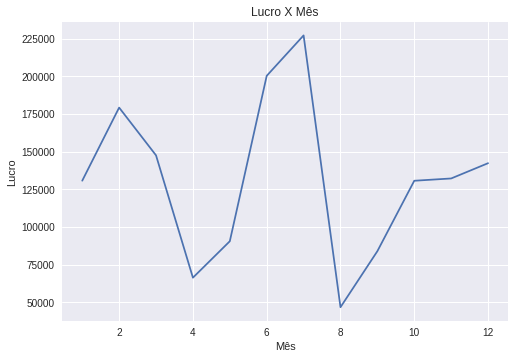

In [161]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro X Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

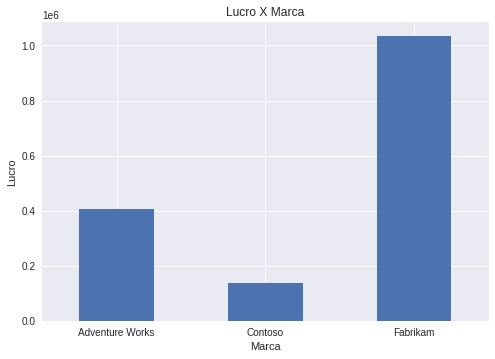

In [163]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro X Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

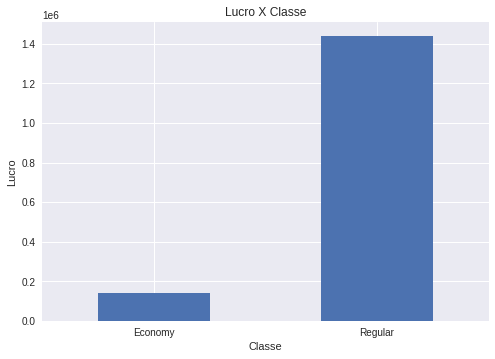

In [164]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro X Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [167]:
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

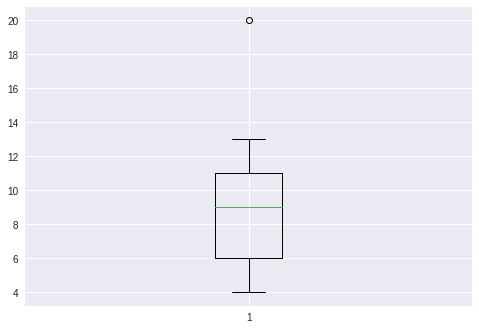

In [169]:
plt.boxplot(df["Tempo Envio"]);

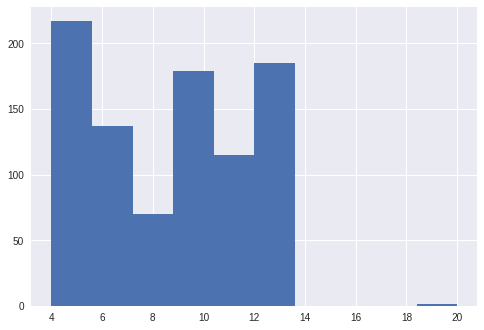

In [170]:
plt.hist(df["Tempo Envio"]);

In [172]:
df["Tempo Envio"].min()

4

In [173]:
df["Tempo Envio"].max()

20

In [174]:
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [175]:
df.to_csv("df_vendas_novo.csv", index=False)

Para executar o código na célula acima, clique nela e depois pressione o botão Play à esquerda do código ou use o atalho do teclado "Command/Ctrl+Enter". Para editar o código, basta clicar na célula e começar a editar.

As variáveis definidas em uma célula podem ser usadas mais tarde em outras células:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Os notebooks do Colab permitem combinar <strong>código executável</strong> e <strong>rich text</strong> em um só documento, além de <strong>imagens</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> e muito mais. Quando você cria seus próprios notebooks do Colab, eles são armazenados na sua conta do Google Drive. É possível compartilhar os notebooks do Colab facilmente com colegas de trabalho ou amigos e permitir que eles façam comentários ou até editem o documento. Para saber mais, consulte a <a href="/notebooks/basic_features_overview.ipynb">Visão Geral do Colab</a>. Para criar um novo notebook do Colab, use o menu Arquivo acima ou acesse o seguinte: <a href="http://colab.research.google.com#create=true">criar um novo notebook do Colab</a>.

Os notebooks do Colab são notebooks do Jupyter hospedados no Colab. Para saber mais sobre o projeto Jupyter, acesse <a href="https://www.jupyter.org">jupyter.org</a>.

## Ciência de dados

Com o Colab, você pode aproveitar todo o potencial das conhecidas bibliotecas Python para analisar e ver dados. A célula de códigos abaixo usa <strong>numpy</strong> para gerar dados aleatórios e <strong>matplotlib</strong> para visualizá-los. Para editar o código, basta clicar na célula e começar a editar.

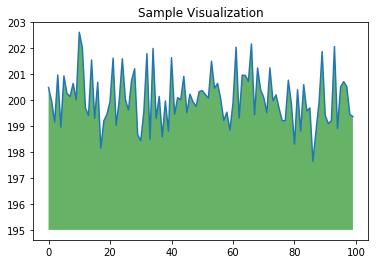

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

É possível importar para os notebooks do Colab os dados da sua conta do Google Drive, como planilhas. Também é possível importar do GitHub e de muitas outras fontes. Para saber mais sobre como importar dados e como o Colab pode ser usado para a ciência de dados, consulte o link abaixo em <a href="#working-with-data">Como trabalhar com dados</a>.

## Machine learning

Com o Colab, é possível importar um conjunto de dados de imagem, treinar um classificador de imagens dentro dele e avaliar o modelo, tudo com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os notebooks do Colab executam código dos servidores em nuvem do Google. Isso significa que você pode tirar proveito da potência de hardware do Google, como <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Você só precisa de um navegador.

O Colab é usado amplamente pela comunidade de machine learning, para aplicações como:
- Primeiros passos com o TensorFlow
- Desenvolvimento e treinamento de redes neurais
- Experimentos com TPUs
- Divulgação de pesquisas em IA
- Criação de tutoriais

Para ver notebooks do Colab que demonstram aplicações de machine learning, consulte os <a href="#machine-learning-examples">exemplos de machine learning</a> abaixo.

## Mais recursos

### Como trabalhar com Notebooks no Colab
- [Visão geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Salvar e carregar notebooks no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 no Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Como trabalhar com dados
- [Carregar dados: Drive, Planilhas e Google Cloud Storage](/notebooks/io.ipynb) 
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Primeiros passos com o BigQuery](/notebooks/bigquery.ipynb)

### Curso intensivo de machine learning
Estes são alguns notebooks do curso on-line do Google sobre machine learning. Acesse o <a href="https://developers.google.com/machine-learning/crash-course/">site do curso completo</a> para saber mais.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras e uso de dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Exemplos de machine learning

Para ver exemplos completos das análises interativas de machine learning possibilitadas pelo Colaboratory, confira estes tutoriais que usam modelos do <a href="https://tfhub.dev">TensorFlow Hub</a>.

Vejas alguns exemplos:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Treinar novamente um classificador de imagens</a>: crie um modelo do Keras com base em um classificador de imagens pré-treinado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique avaliações de filmes do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: use o aprendizado profundo para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: use um modelo de machine learning para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolação de vídeo</a>: preveja o que aconteceu em um vídeo entre o primeiro e o último frames.
